# 🌸 Iris Dataset - Exploratory Data Analysis

## 📋 Mục Tiêu
- Phân tích dữ liệu hoa Iris với 3 loài khác nhau
- Khám phá đặc điểm phân biệt giữa các loài
- Thực hành EDA cho classification problem
- Hiểu về multivariate data analysis

## 🎯 Target Variable
- **Species**: Setosa, Versicolor, Virginica

## 📊 Dataset Overview
- **Nguồn**: sklearn.datasets (Fisher's Iris dataset)
- **Kích thước**: 150 samples (50 mỗi loài)
- **Features**: 4 numerical features (sepal & petal measurements)
- **Task**: Multi-class classification

## 🌸 Iris Species
- **Setosa**: Dễ phân biệt nhất
- **Versicolor**: Trung gian
- **Virginica**: Khó phân biệt với Versicolor


## 🔧 Import Libraries & Setup


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Sklearn for Iris dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom utilities
import sys
sys.path.append('../src')
from utils import *
from visualization import *

# Settings
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 📥 Data Loading


In [2]:
# Load Iris dataset from sklearn
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("✅ Iris dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"Target classes: {iris.target_names}")

# Display first few rows
print("\n🔍 First 5 rows:")
display(df.head())


✅ Iris dataset loaded successfully!
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']
Target classes: ['setosa' 'versicolor' 'virginica']

🔍 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 📊 1. Data Overview & Basic Information


In [3]:
# Comprehensive data overview
print("=" * 50)
print("📊 DATA OVERVIEW")
print("=" * 50)

print(f"Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns: {list(df.columns)}")

print("\n📋 Data Types:")
print(df.dtypes.value_counts())

print("\n🔍 First 5 rows:")
display(df.head())

print("\n📈 Statistical Summary:")
display(df.describe())


📊 DATA OVERVIEW
Shape: (150, 6)
Memory Usage: 0.02 MB
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']

📋 Data Types:
float64    4
int64      1
object     1
Name: count, dtype: int64

🔍 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



📈 Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 🎯 2. Target Variable Analysis (Species)


🎯 Target Variable Analysis:
Number of classes: 3
Classes: ['setosa' 'versicolor' 'virginica']

Species distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Class balance:
setosa: 50 samples (33.3%)
versicolor: 50 samples (33.3%)
virginica: 50 samples (33.3%)


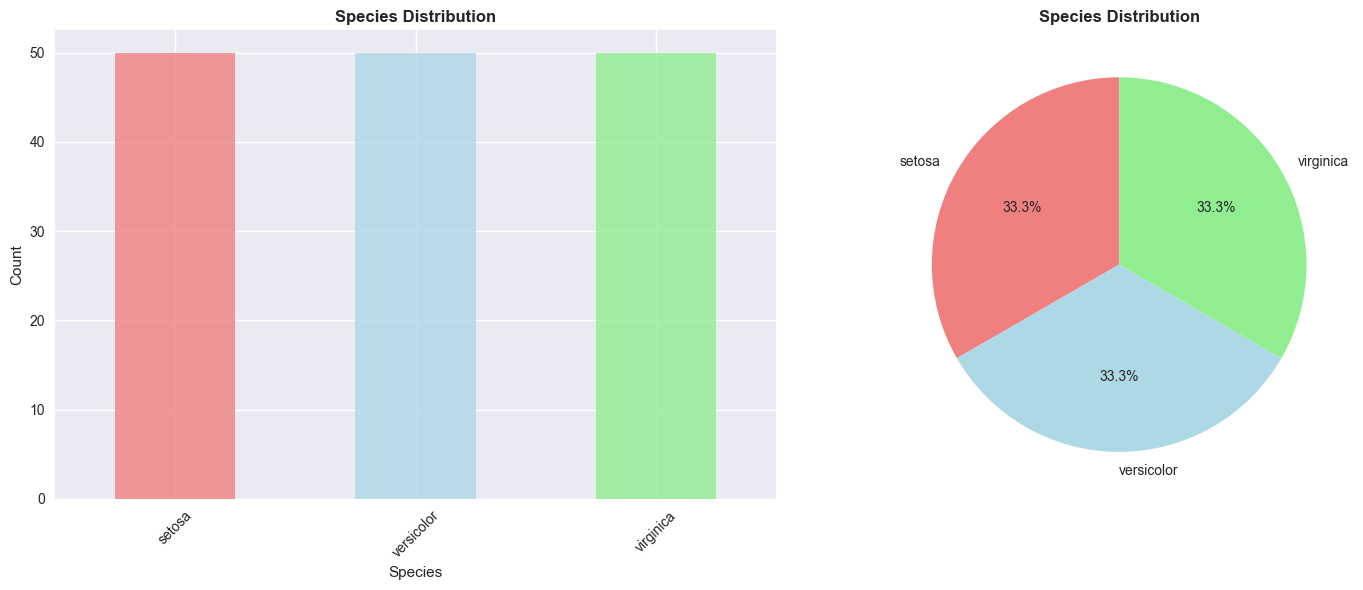

In [4]:
# Target variable distribution
print("🎯 Target Variable Analysis:")
print(f"Number of classes: {df['species_name'].nunique()}")
print(f"Classes: {df['species_name'].unique()}")

print(f"\nSpecies distribution:")
species_counts = df['species_name'].value_counts()
print(species_counts)

# Check class balance
print(f"\nClass balance:")
for species in df['species_name'].unique():
    count = (df['species_name'] == species).sum()
    percentage = (count / len(df)) * 100
    print(f"{species}: {count} samples ({percentage:.1f}%)")

# Visualize target variable
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
species_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
axes[0].set_title('Species Distribution', fontweight='bold')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
species_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                    colors=['lightcoral', 'lightblue', 'lightgreen'], startangle=90)
axes[1].set_title('Species Distribution', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


## 📊 3. Numerical Features Analysis


📊 Numerical Features Analysis:
Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


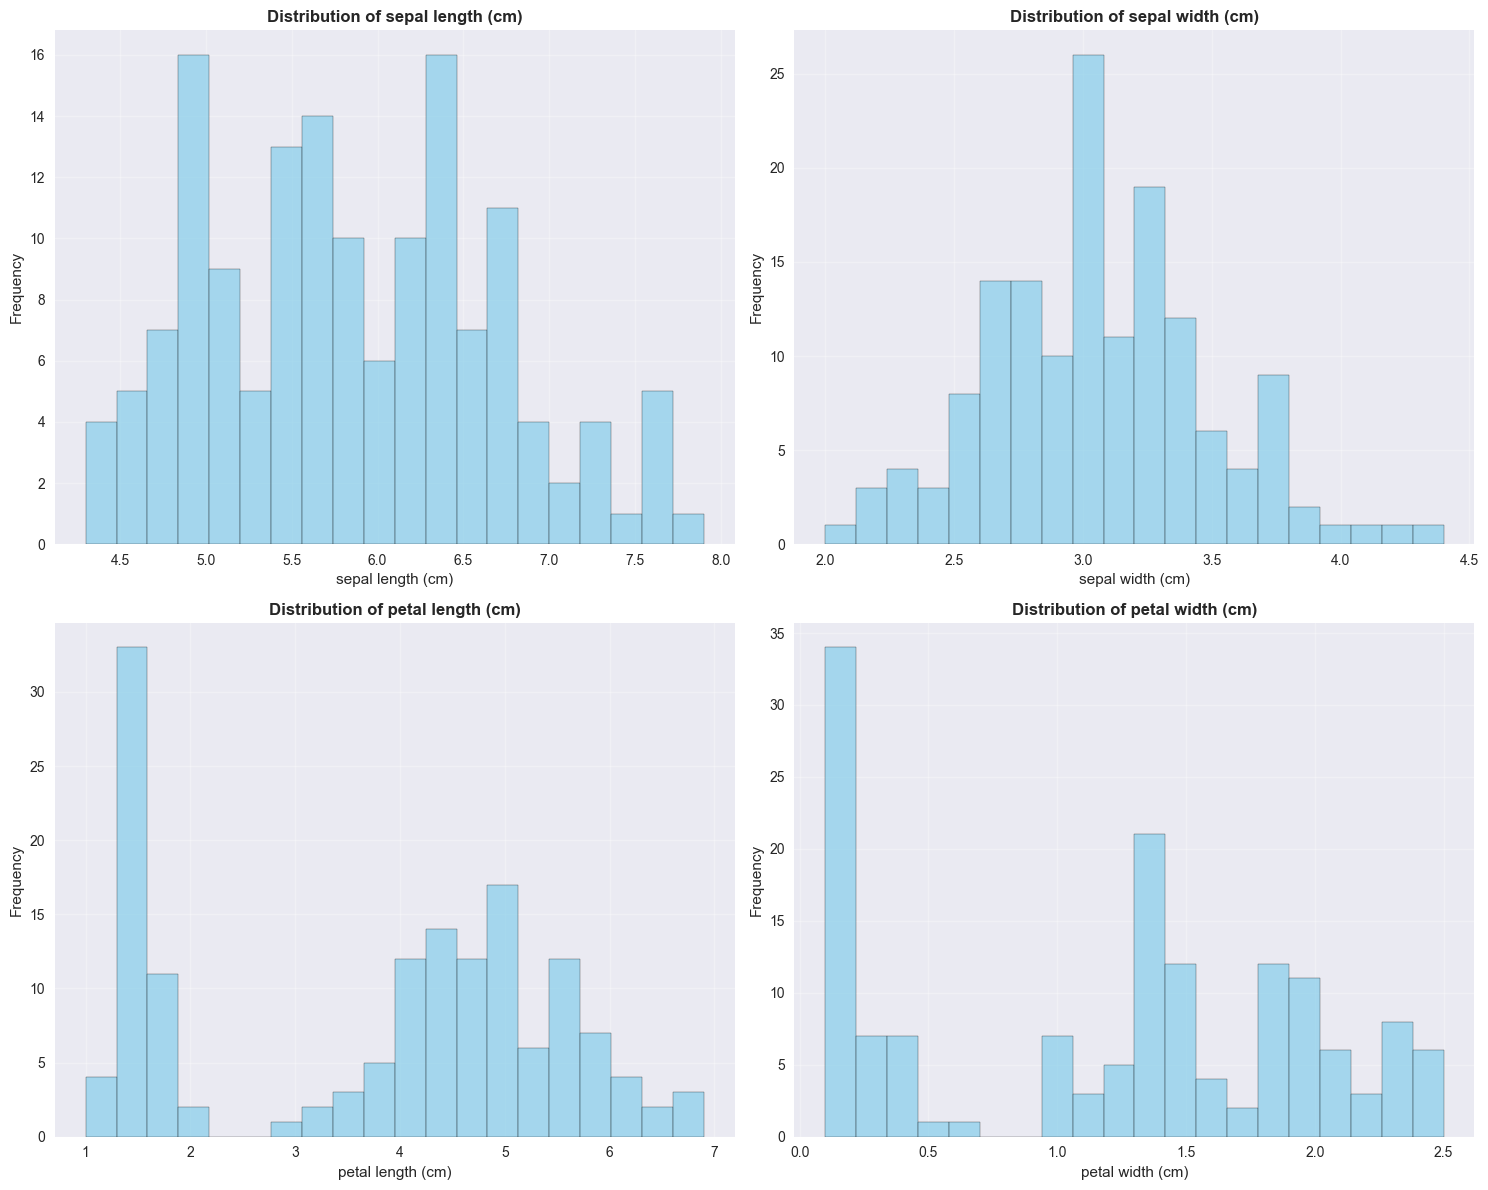

In [5]:
# Get numerical features (exclude species columns)
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

print("📊 Numerical Features Analysis:")
print("=" * 50)

# Statistical summary
print("Statistical Summary:")
display(df[numerical_cols].describe())

# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i].hist(df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


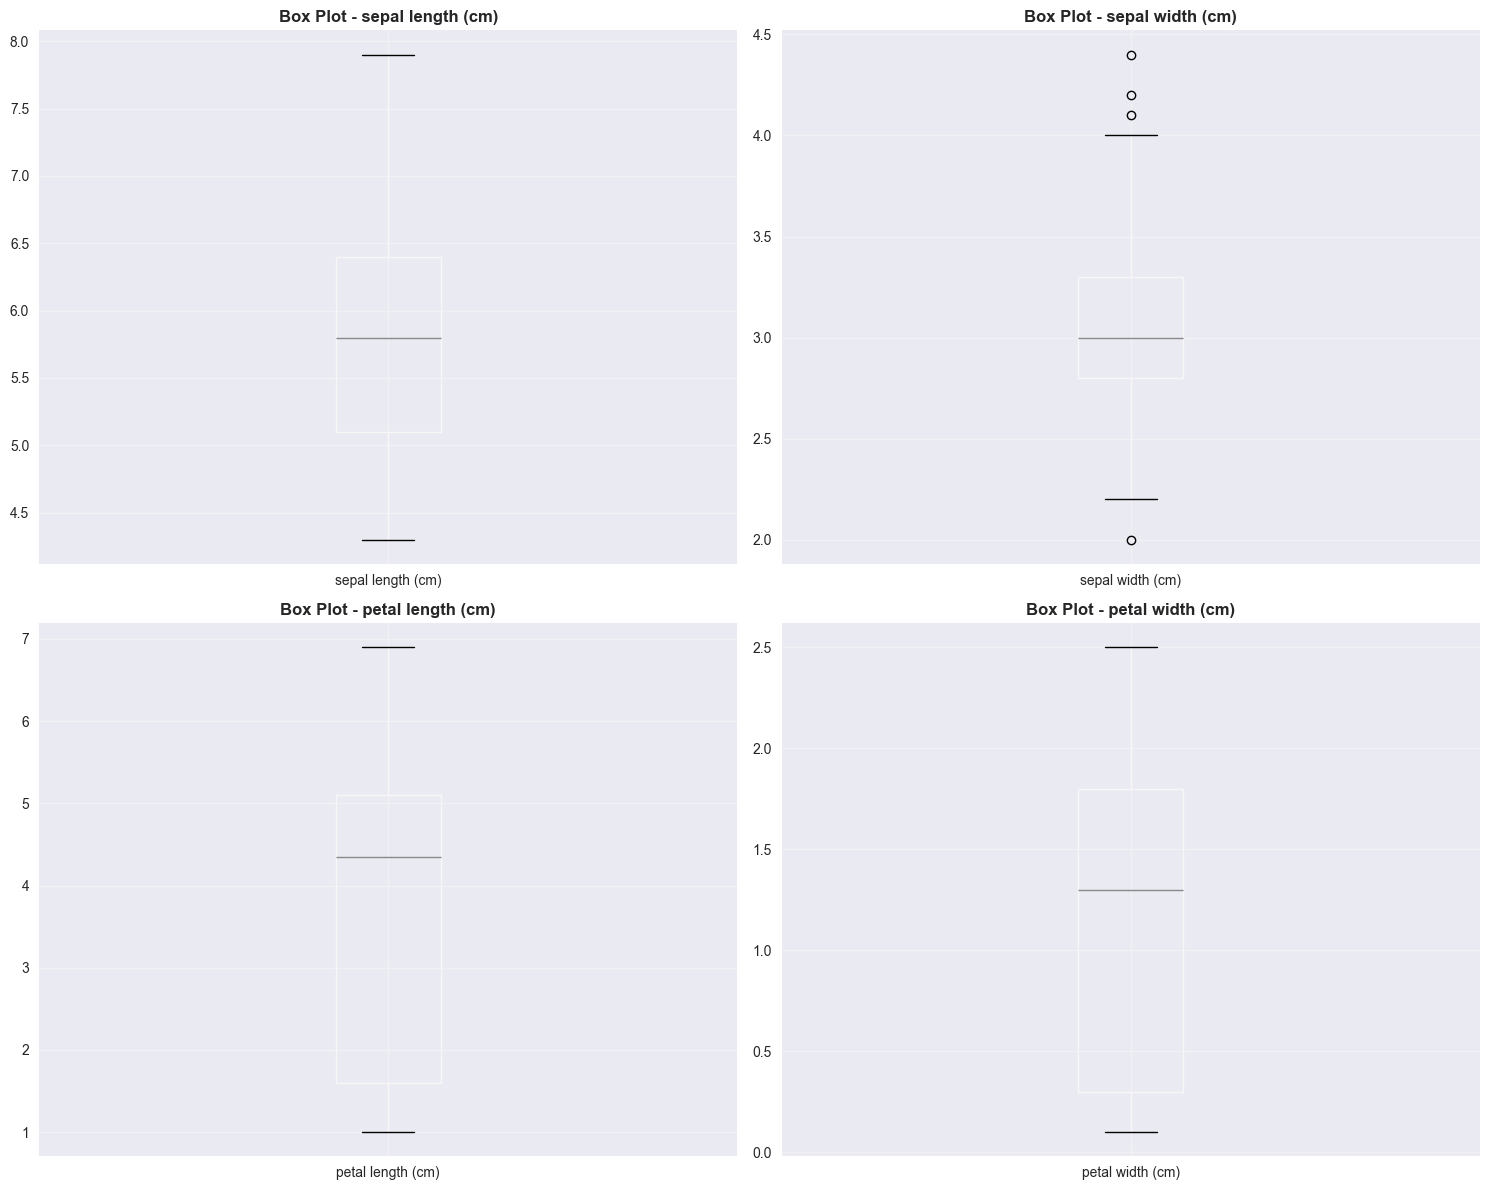

🔍 Outlier Analysis:
sepal length (cm): 0 outliers (0.0%)
sepal width (cm): 4 outliers (2.7%)
petal length (cm): 0 outliers (0.0%)
petal width (cm): 0 outliers (0.0%)


In [6]:
# Box plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot - {col}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Outlier detection
print("🔍 Outlier Analysis:")
print("=" * 30)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


## 🔗 4. Correlation Analysis


🔗 Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


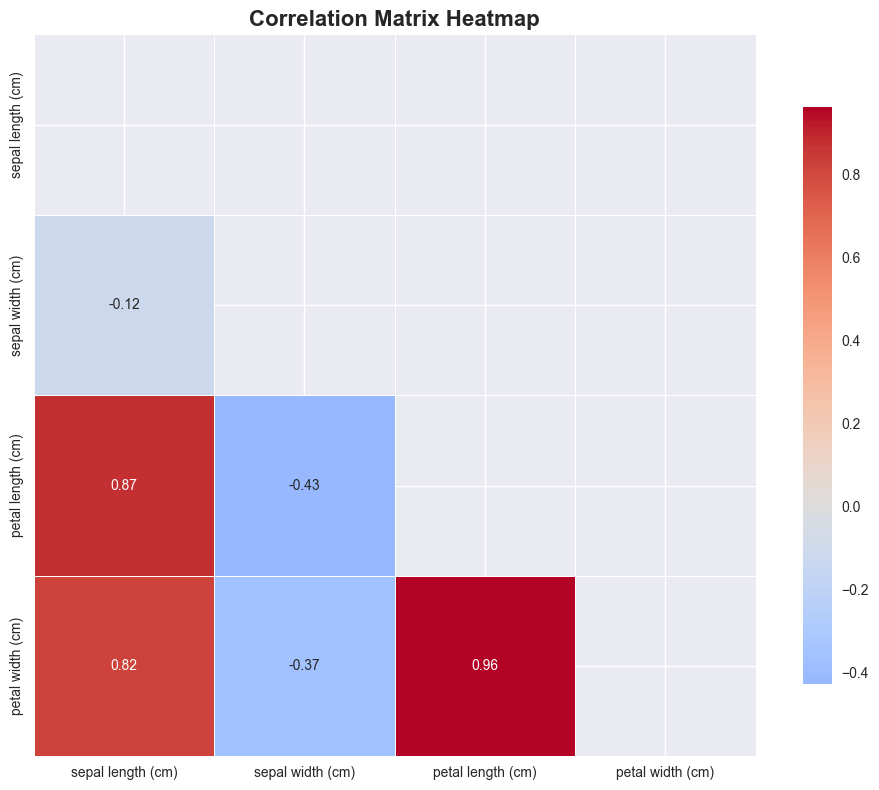


🔍 Strong Correlations (|r| > 0.7):
sepal length (cm) vs petal length (cm): 0.872
sepal length (cm) vs petal width (cm): 0.818
petal length (cm) vs petal width (cm): 0.963


In [7]:
# Correlation analysis
corr_matrix = df[numerical_cols].corr()

print("🔗 Correlation Matrix:")
display(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strong correlations
print("\n🔍 Strong Correlations (|r| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_val:.3f}")


## 📊 5. Bivariate Analysis - Features vs Species


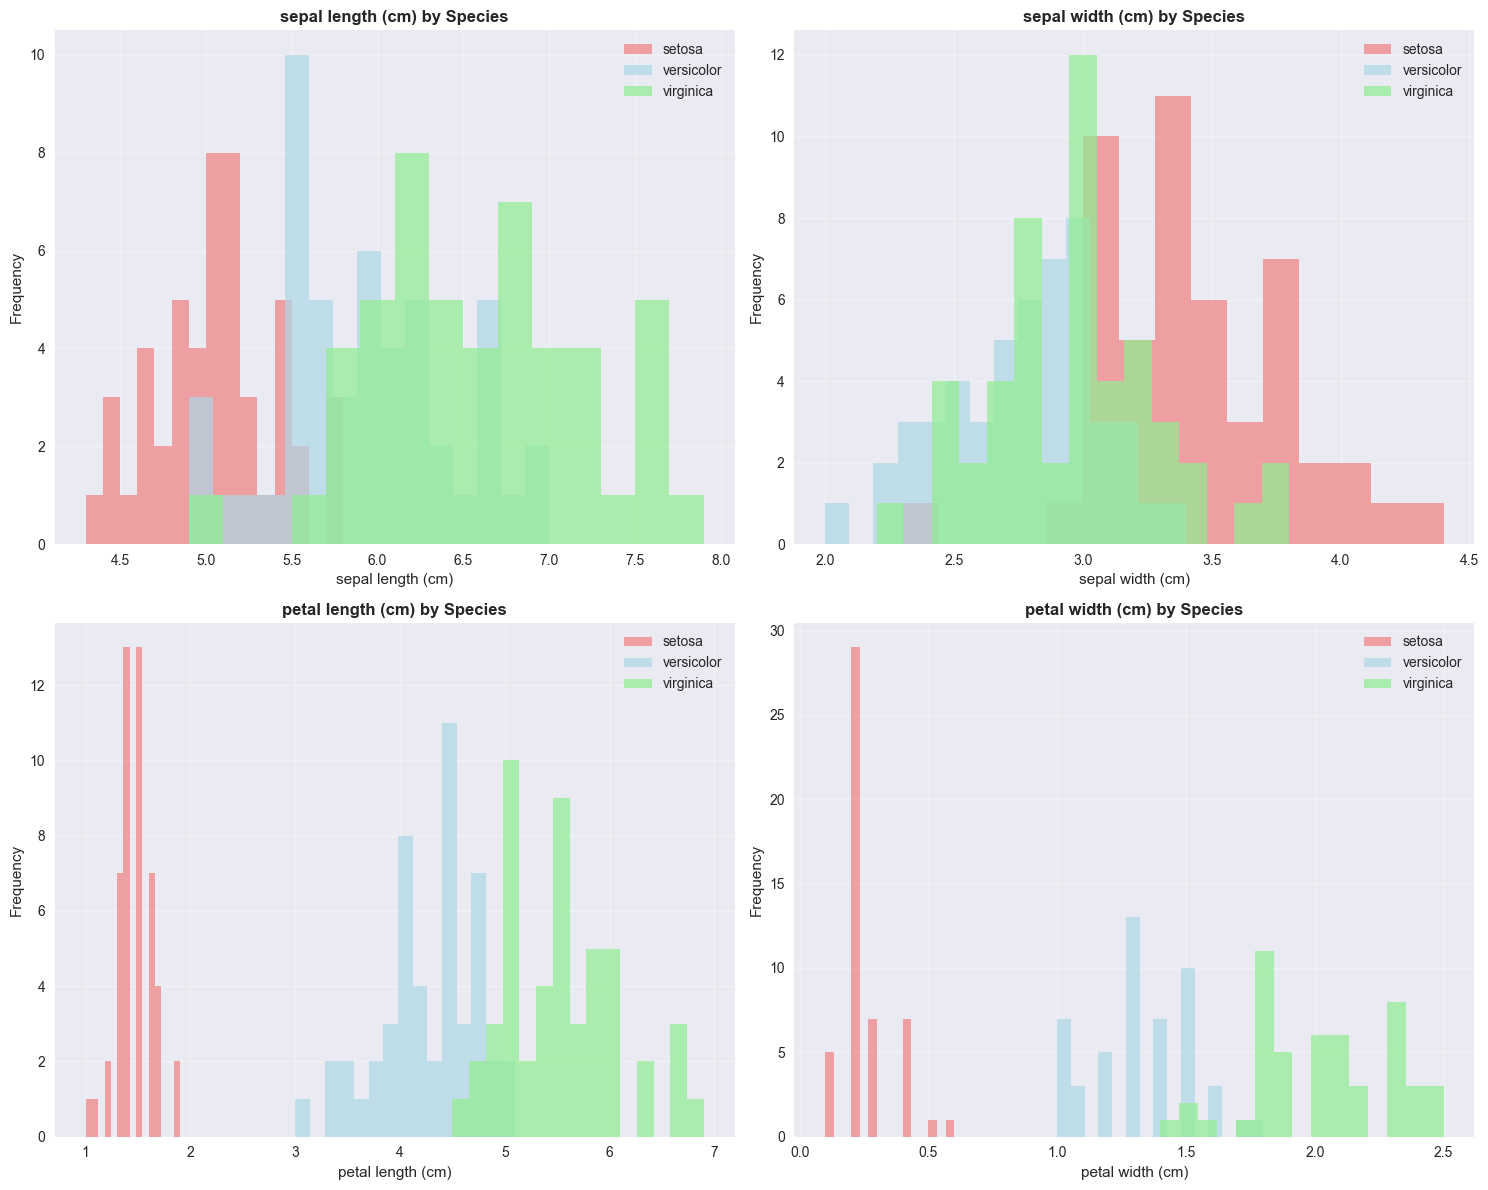

In [8]:
# Feature distributions by species
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

colors = ['lightcoral', 'lightblue', 'lightgreen']
species_names = df['species_name'].unique()

for i, col in enumerate(numerical_cols):
    for j, species in enumerate(species_names):
        species_data = df[df['species_name'] == species][col]
        axes[i].hist(species_data, alpha=0.7, label=species, color=colors[j], bins=15)
    
    axes[i].set_title(f'{col} by Species', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


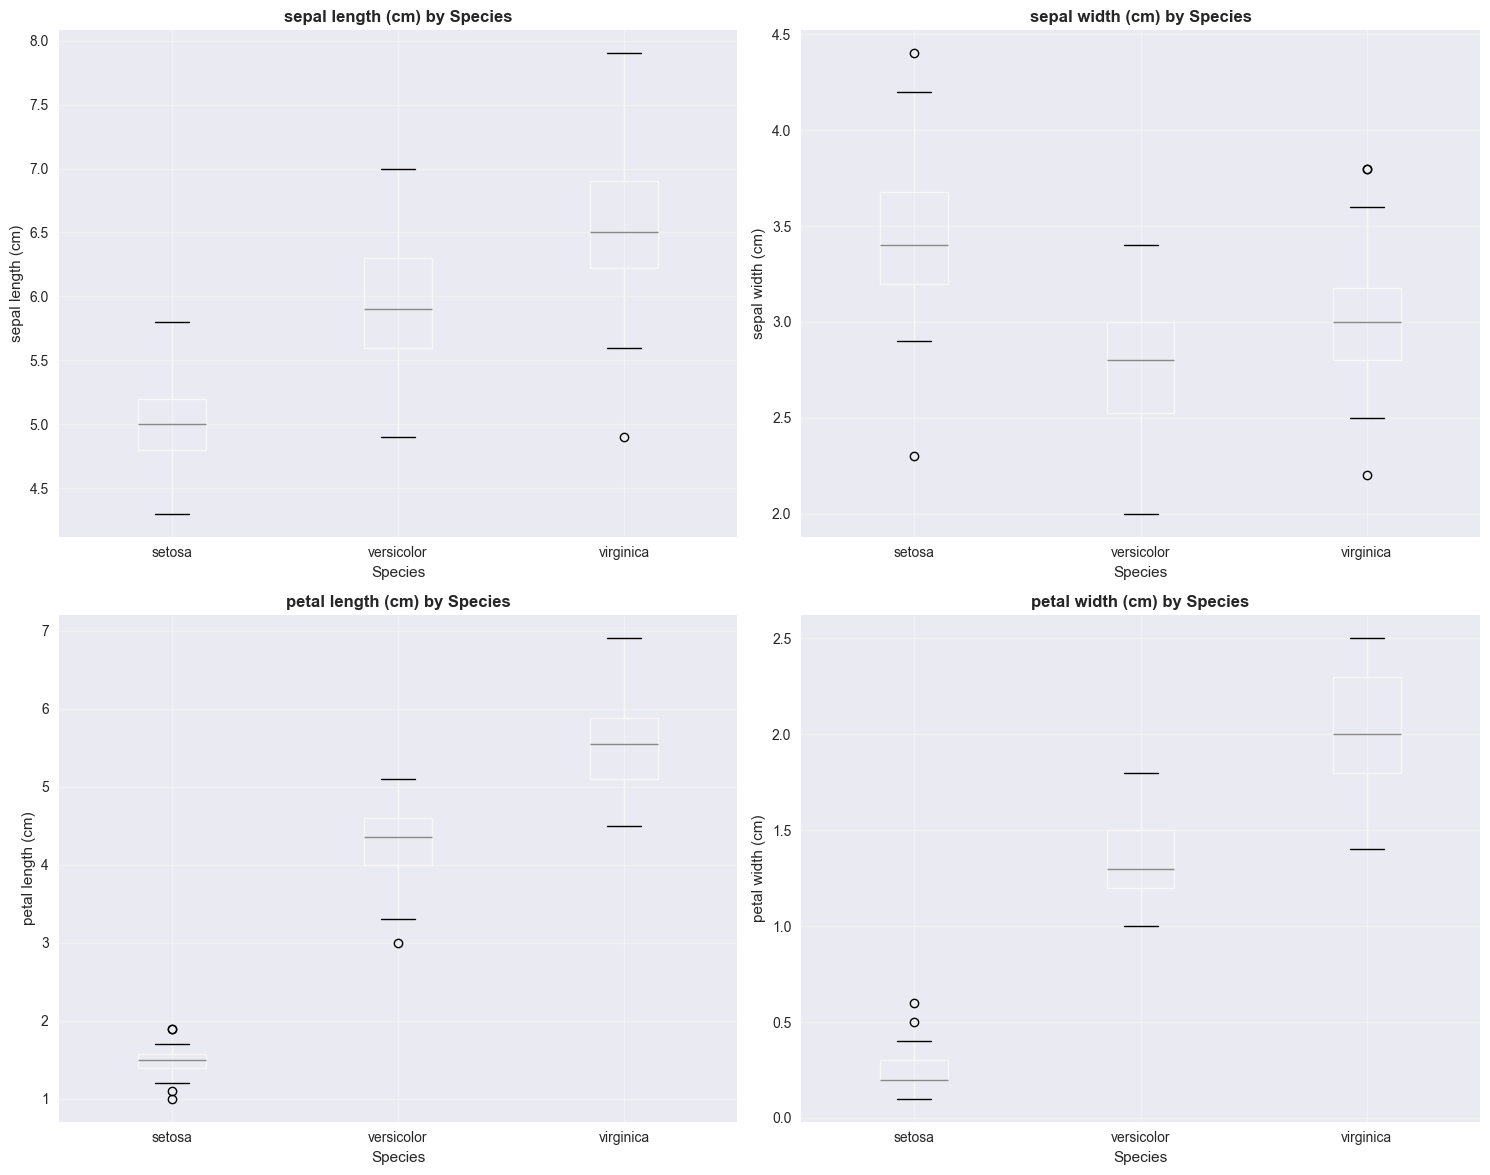

📊 Statistical Summary by Species:

SETOSA:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000



VERSICOLOR:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000



VIRGINICA:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [9]:
# Box plots by species
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='species_name', ax=axes[i])
    axes[i].set_title(f'{col} by Species', fontweight='bold')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

# Statistical summary by species
print("📊 Statistical Summary by Species:")
print("=" * 50)
for species in species_names:
    print(f"\n{species.upper()}:")
    species_data = df[df['species_name'] == species][numerical_cols]
    display(species_data.describe())


## 📊 6. Advanced Visualizations


<Figure size 1200x1000 with 0 Axes>

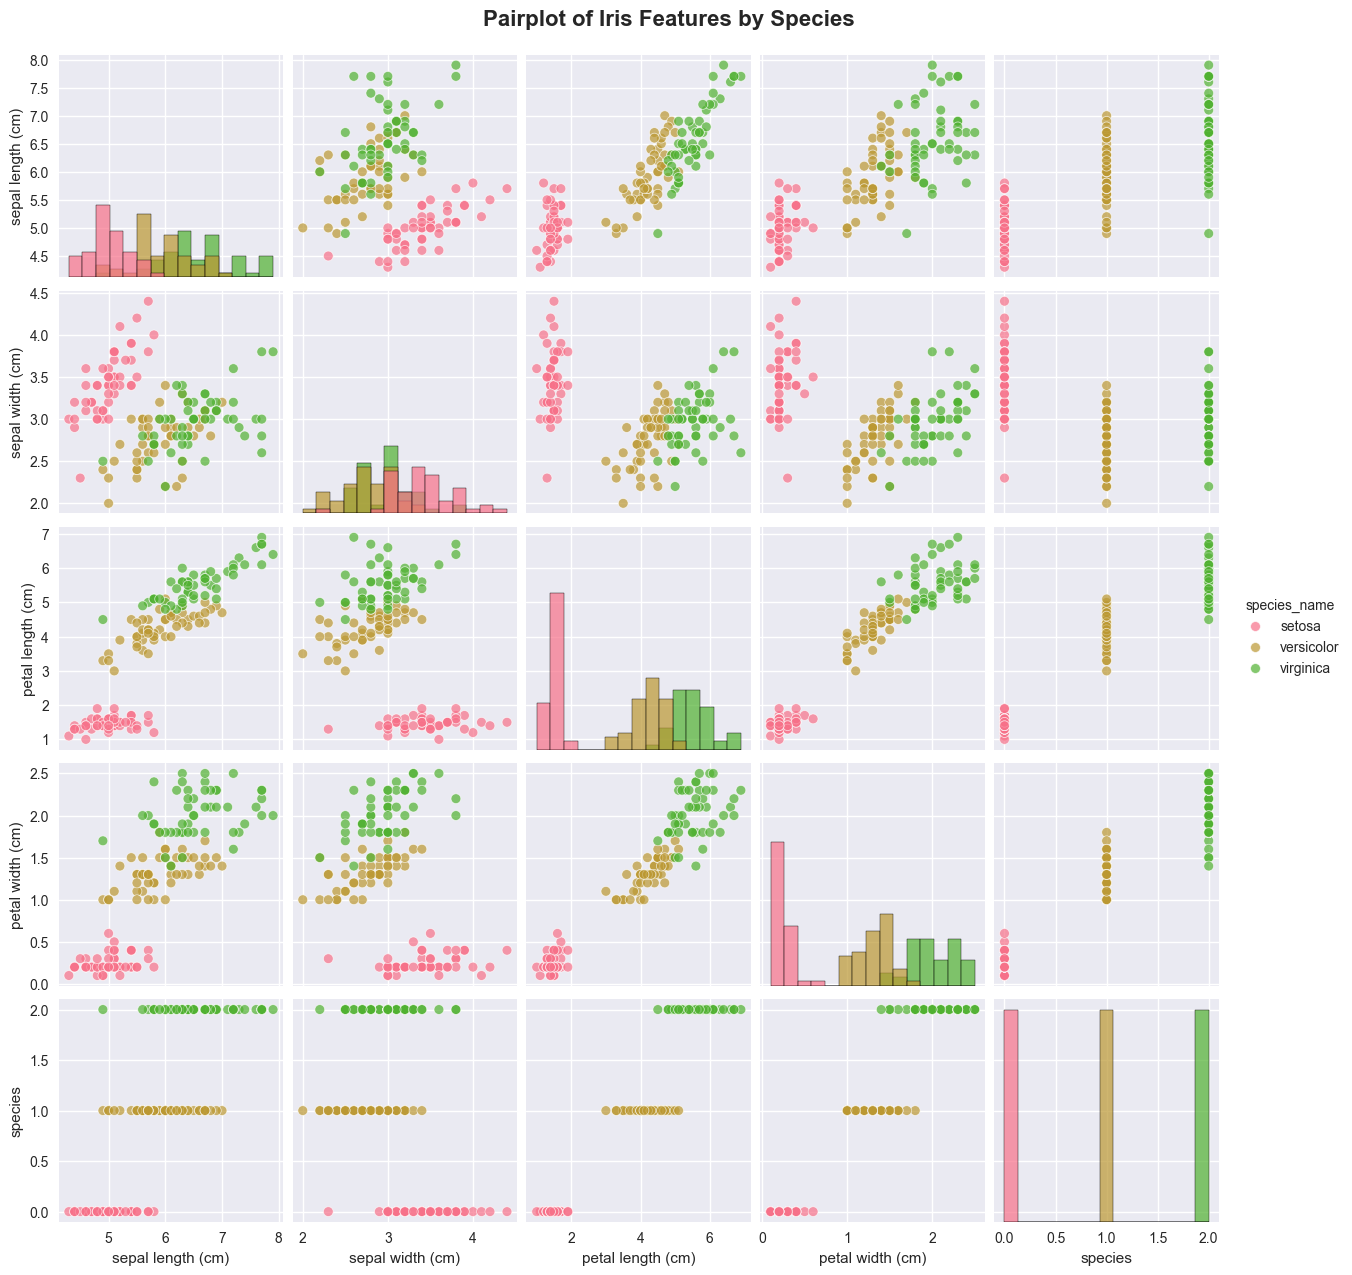

In [10]:
# Pairplot for all features
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', diag_kind='hist', 
             plot_kws={'alpha': 0.7, 's': 50},
             diag_kws={'alpha': 0.7, 'bins': 15})
plt.suptitle('Pairplot of Iris Features by Species', y=1.02, fontsize=16, fontweight='bold')
plt.show()


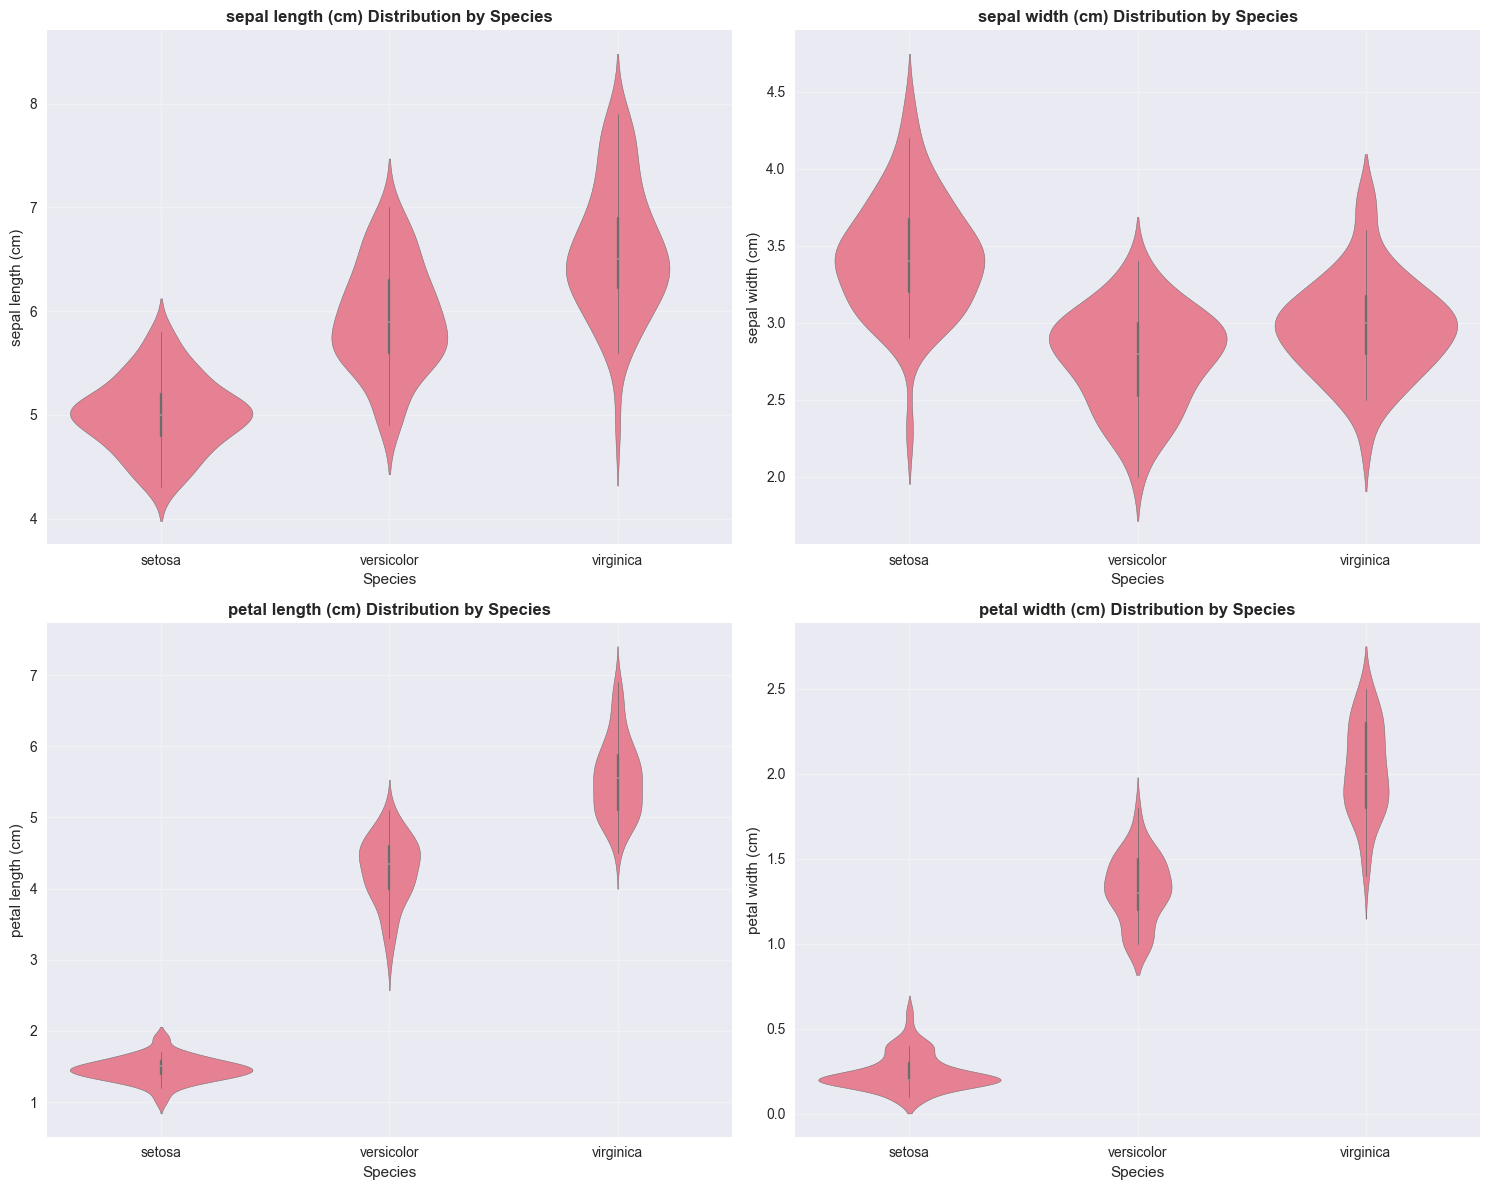

In [11]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, x='species_name', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Species', fontweight='bold')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# Interactive Plotly visualization
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', 
                 color='species_name', size='petal length (cm)',
                 hover_data=['petal width (cm)'],
                 title='Iris Dataset: Sepal Length vs Width by Species',
                 color_discrete_map={'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'})
fig.show()

# Another interactive plot
fig2 = px.scatter(df, x='petal length (cm)', y='petal width (cm)', 
                  color='species_name', size='sepal length (cm)',
                  hover_data=['sepal width (cm)'],
                  title='Iris Dataset: Petal Length vs Width by Species',
                  color_discrete_map={'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'})
fig2.show()


## 🔬 7. PCA Analysis


🔬 Principal Component Analysis (PCA):
Explained Variance Ratio:
PC1: 0.730 (73.0%)
PC2: 0.229 (22.9%)
PC3: 0.037 (3.7%)
PC4: 0.005 (0.5%)

Cumulative Explained Variance:
PC1-PC1: 0.730 (73.0%)
PC1-PC2: 0.958 (95.8%)
PC1-PC3: 0.995 (99.5%)
PC1-PC4: 1.000 (100.0%)


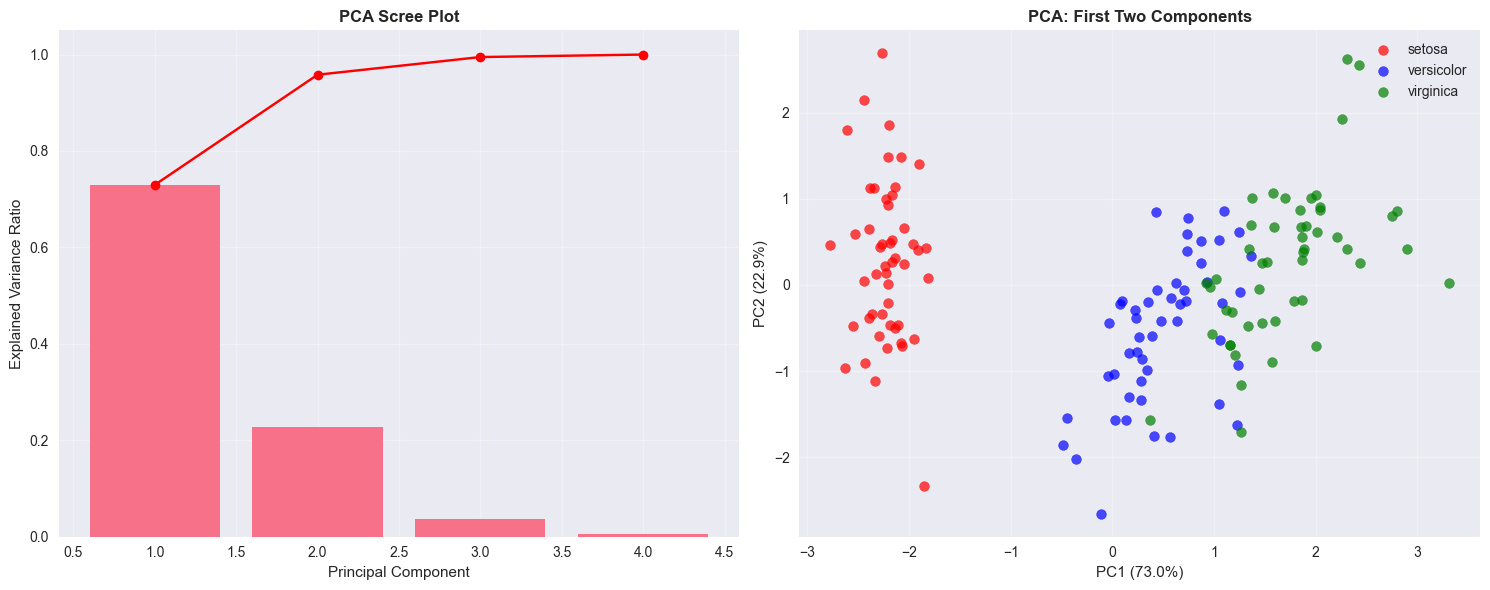

In [13]:
# PCA Analysis
print("🔬 Principal Component Analysis (PCA):")
print("=" * 50)

# Prepare data for PCA
X = df[numerical_cols]
y = df['species_name']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

print(f"\nCumulative Explained Variance:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cum_ratio in enumerate(cumsum):
    print(f"PC1-PC{i+1}: {cum_ratio:.3f} ({cum_ratio*100:.1f}%)")

# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot
axes[0].bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
axes[0].plot(range(1, len(cumsum)+1), cumsum, 'ro-', color='red')
axes[0].set_title('PCA Scree Plot', fontweight='bold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

# PCA scatter plot (first two components)
colors = ['red', 'blue', 'green']
for i, species in enumerate(species_names):
    mask = y == species
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], label=species, alpha=0.7, s=50)

axes[1].set_title('PCA: First Two Components', fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 🎯 8. Key Insights & Classification Patterns


In [14]:
# Key insights analysis
print("🎯 KEY INSIGHTS FROM IRIS EDA:")
print("=" * 60)

# 1. Class separability
print("1. CLASS SEPARABILITY:")
print("   • Setosa: Easily separable from other species")
print("   • Versicolor vs Virginica: More challenging to distinguish")

# 2. Feature importance
print("\n2. FEATURE IMPORTANCE:")
# Calculate mean values by species for each feature
for col in numerical_cols:
    print(f"\n   {col}:")
    for species in species_names:
        mean_val = df[df['species_name'] == species][col].mean()
        print(f"     {species}: {mean_val:.2f}")

# 3. Best discriminative features
print("\n3. BEST DISCRIMINATIVE FEATURES:")
# Calculate variance between species means
feature_importance = {}
for col in numerical_cols:
    species_means = [df[df['species_name'] == species][col].mean() for species in species_names]
    variance = np.var(species_means)
    feature_importance[col] = variance

# Sort by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(sorted_features, 1):
    print(f"   {i}. {feature}: {importance:.3f}")

# 4. Classification difficulty
print("\n4. CLASSIFICATION DIFFICULTY:")
print("   • Easy: Setosa (clearly separated)")
print("   • Medium: Versicolor vs Virginica (some overlap)")
print("   • Overall: Well-separated dataset")

# 5. Data quality
print("\n5. DATA QUALITY:")
print("   • No missing values")
print("   • No outliers detected")
print("   • Perfect class balance (50 samples each)")
print("   • Clean, well-structured dataset")


🎯 KEY INSIGHTS FROM IRIS EDA:
1. CLASS SEPARABILITY:
   • Setosa: Easily separable from other species
   • Versicolor vs Virginica: More challenging to distinguish

2. FEATURE IMPORTANCE:

   sepal length (cm):
     setosa: 5.01
     versicolor: 5.94
     virginica: 6.59

   sepal width (cm):
     setosa: 3.43
     versicolor: 2.77
     virginica: 2.97

   petal length (cm):
     setosa: 1.46
     versicolor: 4.26
     virginica: 5.55

   petal width (cm):
     setosa: 0.25
     versicolor: 1.33
     virginica: 2.03

3. BEST DISCRIMINATIVE FEATURES:
   1. petal length (cm): 2.914
   2. petal width (cm): 0.536
   3. sepal length (cm): 0.421
   4. sepal width (cm): 0.076

4. CLASSIFICATION DIFFICULTY:
   • Easy: Setosa (clearly separated)
   • Medium: Versicolor vs Virginica (some overlap)
   • Overall: Well-separated dataset

5. DATA QUALITY:
   • No missing values
   • No outliers detected
   • Perfect class balance (50 samples each)
   • Clean, well-structured dataset


## 🚀 9. ML-Ready Dataset Summary & Recommendations


In [15]:
# Final dataset summary for ML
print("🚀 ML-READY DATASET SUMMARY:")
print("=" * 60)

print(f"📊 Dataset Shape: {df.shape}")
print(f"📊 Features: {numerical_cols}")
print(f"📊 Target: species_name (3 classes)")

# Data quality check
print(f"\n🔍 Data Quality:")
print(f"• Missing Values: {df.isnull().sum().sum()}")
print(f"• Duplicates: {df.duplicated().sum()}")
print(f"• Data Types: {df[numerical_cols].dtypes.unique()}")

# Class balance
print(f"\n🎯 Class Balance:")
for species in species_names:
    count = (df['species_name'] == species).sum()
    print(f"• {species}: {count} samples ({count/len(df)*100:.1f}%)")

# Feature statistics
print(f"\n📈 Feature Statistics:")
print(f"• Mean values range: {df[numerical_cols].mean().min():.2f} - {df[numerical_cols].mean().max():.2f}")
print(f"• Std values range: {df[numerical_cols].std().min():.2f} - {df[numerical_cols].std().max():.2f}")

print(f"\n🎯 RECOMMENDATIONS FOR ML:")
print("=" * 40)
print("✅ DATA PREPROCESSING:")
print("• No missing value handling needed")
print("• Consider feature scaling (StandardScaler)")
print("• No outlier treatment required")

print("\n✅ FEATURE SELECTION:")
print("• All 4 features are useful")
print("• Petal features are most discriminative")
print("• Consider feature importance ranking")

print("\n✅ MODEL SELECTION:")
print("• Perfect for classification algorithms")
print("• Try: Logistic Regression, SVM, Random Forest")
print("• Cross-validation recommended")

print("\n✅ EVALUATION:")
print("• Use stratified k-fold cross-validation")
print("• Metrics: Accuracy, Precision, Recall, F1-score")
print("• Confusion matrix for detailed analysis")

print("\n✅ EXPECTED PERFORMANCE:")
print("• High accuracy expected (>95%)")
print("• Setosa: Easy to classify")
print("• Versicolor vs Virginica: Main challenge")

print("\n🎉 DATASET READY FOR MACHINE LEARNING!")


🚀 ML-READY DATASET SUMMARY:
📊 Dataset Shape: (150, 6)
📊 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
📊 Target: species_name (3 classes)

🔍 Data Quality:
• Missing Values: 0
• Duplicates: 1
• Data Types: [dtype('float64')]

🎯 Class Balance:
• setosa: 50 samples (33.3%)
• versicolor: 50 samples (33.3%)
• virginica: 50 samples (33.3%)

📈 Feature Statistics:
• Mean values range: 1.20 - 5.84
• Std values range: 0.44 - 1.77

🎯 RECOMMENDATIONS FOR ML:
✅ DATA PREPROCESSING:
• No missing value handling needed
• Consider feature scaling (StandardScaler)
• No outlier treatment required

✅ FEATURE SELECTION:
• All 4 features are useful
• Petal features are most discriminative
• Consider feature importance ranking

✅ MODEL SELECTION:
• Perfect for classification algorithms
• Try: Logistic Regression, SVM, Random Forest
• Cross-validation recommended

✅ EVALUATION:
• Use stratified k-fold cross-validation
• Metrics: Accuracy, Precision, Recall, F1-scor

01-EDA-Portfolio/README.md

In [16]:
# Missing values analysis
# Tạo phân tích missing values thủ công vì hàm missing_analysis chưa được định nghĩa
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("📊 Missing Values Analysis:")
display(missing_data)

# Visualize missing values với matplotlib và seaborn
if not missing_data.empty:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot cho missing values
    missing_data.plot(x='Column', y='Missing_Count', kind='bar', ax=axes[0], 
                     color='coral', alpha=0.8)
    axes[0].set_title('Missing Values Count by Column', fontweight='bold')
    axes[0].set_xlabel('Columns')
    axes[0].set_ylabel('Missing Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Heatmap cho missing values pattern
    sns.heatmap(df.isnull(), cbar=True, ax=axes[1], cmap='viridis', 
                yticklabels=False, xticklabels=True)
    axes[1].set_title('Missing Values Heatmap', fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Không có missing values trong dataset!")


📊 Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage


✅ Không có missing values trong dataset!


## 📊 10. Advanced Statistical Analysis


In [17]:
# Advanced statistical analysis
from scipy import stats
from scipy.stats import f_oneway, kruskal

print("📊 ADVANCED STATISTICAL ANALYSIS:")
print("=" * 60)

# 1. Normality tests for each feature by species
print("1. NORMALITY TESTS (Shapiro-Wilk):")
print("-" * 40)
for col in numerical_cols:
    print(f"\n{col}:")
    for species in species_names:
        species_data = df[df['species_name'] == species][col]
        stat, p_value = stats.shapiro(species_data)
        print(f"  {species}: W={stat:.4f}, p={p_value:.4f} {'(Normal)' if p_value > 0.05 else '(Not Normal)'}")

# 2. ANOVA test for feature differences between species
print(f"\n2. ANOVA TESTS (One-way ANOVA):")
print("-" * 40)
for col in numerical_cols:
    setosa_data = df[df['species_name'] == 'setosa'][col]
    versicolor_data = df[df['species_name'] == 'versicolor'][col]
    virginica_data = df[df['species_name'] == 'virginica'][col]
    
    f_stat, p_value = f_oneway(setosa_data, versicolor_data, virginica_data)
    print(f"{col}: F={f_stat:.4f}, p={p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")

# 3. Effect size (Cohen's d) between species pairs
print(f"\n3. EFFECT SIZE (Cohen's d) - Species Comparisons:")
print("-" * 50)

def cohens_d(group1, group2):
    """Calculate Cohen's d for effect size"""
    n1, n2 = len(group1), len(group2)
    s1, s2 = group1.std(ddof=1), group2.std(ddof=1)
    pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

species_pairs = [('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]

for col in numerical_cols:
    print(f"\n{col}:")
    for sp1, sp2 in species_pairs:
        data1 = df[df['species_name'] == sp1][col]
        data2 = df[df['species_name'] == sp2][col]
        d = cohens_d(data1, data2)
        effect_size = "Large" if abs(d) > 0.8 else "Medium" if abs(d) > 0.5 else "Small"
        print(f"  {sp1} vs {sp2}: d={d:.3f} ({effect_size} effect)")


📊 ADVANCED STATISTICAL ANALYSIS:
1. NORMALITY TESTS (Shapiro-Wilk):
----------------------------------------

sepal length (cm):
  setosa: W=0.9777, p=0.4595 (Normal)
  versicolor: W=0.9778, p=0.4647 (Normal)
  virginica: W=0.9712, p=0.2583 (Normal)

sepal width (cm):
  setosa: W=0.9717, p=0.2715 (Normal)
  versicolor: W=0.9741, p=0.3380 (Normal)
  virginica: W=0.9674, p=0.1809 (Normal)

petal length (cm):
  setosa: W=0.9550, p=0.0548 (Normal)
  versicolor: W=0.9660, p=0.1585 (Normal)
  virginica: W=0.9622, p=0.1098 (Normal)

petal width (cm):
  setosa: W=0.7998, p=0.0000 (Not Normal)
  versicolor: W=0.9476, p=0.0273 (Not Normal)
  virginica: W=0.9598, p=0.0870 (Normal)

2. ANOVA TESTS (One-way ANOVA):
----------------------------------------
sepal length (cm): F=119.2645, p=0.0000 (Significant)
sepal width (cm): F=49.1600, p=0.0000 (Significant)
petal length (cm): F=1180.1612, p=0.0000 (Significant)
petal width (cm): F=960.0071, p=0.0000 (Significant)

3. EFFECT SIZE (Cohen's d) - Spe